# Problem 2: QuickSort

## 1) Set up the programming environment

In [27]:
import sys
print('Work with Python version:', sys.version)

Work with Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]


#### The option to merge data

There are many options to use the quick sort code algorithm to solve the question. In this case, we have chosen to use Python as a set up environment. We also carefully look at how much time and memory are executed inorder to support the decision making process and provide our solution more reliable and easy to follow.


## 2) Database preparing
### 2.1 Download and Clean the data

In [28]:
!pip install memory_profiler

import pandas as pd
import numpy as np
from heapq import merge
import time
from memory_profiler import memory_usage
import numpy as np
import random

In [29]:
data = pd.read_csv('worldcities.csv')
data.head()

city city_ascii      lat       lng    country iso2 iso3   admin_name  \
0      Tokyo      Tokyo  35.6897  139.6922      Japan   JP  JPN        Tōkyō   
1    Jakarta    Jakarta  -6.1750  106.8275  Indonesia   ID  IDN      Jakarta   
2      Delhi      Delhi  28.6100   77.2300      India   IN  IND        Delhi   
3  Guangzhou  Guangzhou  23.1300  113.2600      China   CN  CHN    Guangdong   
4     Mumbai     Mumbai  19.0761   72.8775      India   IN  IND  Mahārāshtra   

   capital  population          id  
0  primary  37732000.0  1392685764  
1  primary  33756000.0  1360771077  
2    admin  32226000.0  1356872604  
3    admin  26940000.0  1156237133  
4    admin  24973000.0  1356226629

In [30]:
data.describe()

lat           lng    population            id
count  44691.000000  44691.000000  4.438400e+04  4.469100e+04
mean      25.933692     14.526105  1.143739e+05  1.454094e+09
std       23.225258     71.153080  7.148542e+05  2.625680e+08
min      -54.933300   -179.600000  0.000000e+00  1.004003e+09
25%       12.900000    -48.109750  1.218700e+04  1.250637e+09
50%       32.340000     13.500000  2.099900e+04  1.380780e+09
75%       43.333300     77.316550  4.800775e+04  1.705844e+09
max       81.716600    179.370300  3.773200e+07  1.934976e+09

## 3) The solution

### Problem 1 quick sort

### At first, use the unique latitude values of each city only. (25 marks)

In [31]:
# select only latitude column 
df = data['lat']
print(f'List of latitude values : {df.head()}')
print('')
print(f'Total number of latitude values : {df.count()}')

List of latitude values : 0    35.6897
1    -6.1750
2    28.6100
3    23.1300
4    19.0761
Name: lat, dtype: float64

Total number of latitude values : 44691


In [32]:
# Check for duplication value
print(f'Duplication value in latitude column : {df.duplicated().sum()}')

Duplication value in latitude column : 10034


In [33]:
# As required from the task, drop the row with duplication values
df = df.drop_duplicates()
df.shape

(34657,)

In [34]:
# Turn data into pandas Dataframe and Check the type of data
df = pd.DataFrame(df)
df['lat'].dtype
# print(type(df))

dtype('float64')

In [35]:
# Get the data ready by turned data into one dimentional numpy array
dfn = pd.DataFrame(df).to_numpy()
print(f'Types of Latitude values : {type(dfn)}' )

dfn = dfn.flatten()
print(f'Latitude values in one dimentional numpy array form : {dfn}')

# Check the shape to make sure that get the same number after turn data to numpy array
print(f'Shape : {dfn.shape}')

Types of Latitude values : <class 'numpy.ndarray'>
Latitude values in one dimentional numpy array form : [ 35.6897  -6.175   28.61   ...  81.7166 -16.7795  74.0165]
Shape : (34657,)


### Quick sort algorithm : A divided and conquer approach:

The quicksort algorithm is a sorting algorithm that uses the concept, divided - conquer. It divides data into subarray partitions that are the backbone of quick sort until one element left, then selects pivot elements and recursively sorts them until each subarray contains a single element.

### Decision making 

1) Random Pivot: Select the pivot value is selected based on a random numbe.
2) Last element as Pivot: The pivot is selected from the first index of an array.

### Algorithm steps:

1. Initialization: Begins with an unsorted array, indexed from 0 to n-1,and n is the number of elements in the array.
2. Pivot selection: A pivot element is selected randomly from the array.
3. Partitioning: Then start to count the element, upper bound(start) and lower bound(end), increment by one  move from right to left |median| decrease by one move from right to left. If we find any element which is greater than pivot element we will stop the start position, otherwise stop the increment. if we find an element that is less than or equal to pivot we are going to increment it, swift until find less than and greater.                                                                    
4. Recursion: the algorithm then recursively sorts the subarrays formed by the partitioning step.                              
5. Termination: the recursion loops terminate when the sub arrays are reduced to single elements at the point when the entire array is sorted.



i.The flow chart shows an easy step of how quick sort is implemented to sort city latitudes in ordered list.

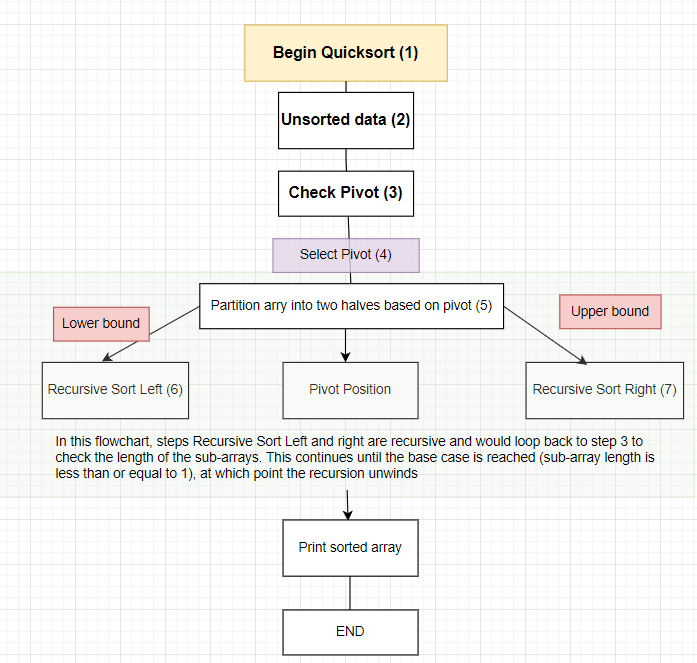

II. Pseudo code

In [13]:
# Begin quick sort
QuickSort (Array, LowerBound, UperBound):
        # ensure that function only process with pationing and recursive calls if there are at least two element to sort,
        # when the lower bound is not less than upper bound, the function return nothing, means ending the function 
    if (LowerBound < UpperBound)
    
        Loc(PartitionIndex) = Partition(Array, LowerBound, UpperBound): # return partition function in log.
        
        # separately sort elements before and after partition or recursive quicksort call.
        QuickSort(Array, LowerBound, Loc - 1);
        QuickSort(Array, LowerBound + 1, UpperBound);
        
# select a pivot, partition array around the pivot and returns the new index of pivot. 
Partition(Array, LowerBound, UpperBound):
    
    #Two optional: 
    # 1. Select a random element as a pivot.
    PivotPosition = Random between Array[LowerBound and UpperBound]
    Swap Array of PivotPosition with Array of UpperBound # swap pivot position, move to the end 
    
    # 2. Select a last element as a pivot     
    Pivot = Array[UpperBound]
    
    # Index of smaller element
    Start = LowerBound  (j, starting index)
    End = LowerBound - 1 (i, ending index)
    

    While Start from LowerBound < UpperBound:
    
    # If the current element is smaller than the pivot.
       If Array[Start] <= Pivot:
            End = End + 1
            Swap Array[End] with Array[Start]
    
    # Swap the pivot element with the element at i + 1
    Swap Array[End + 1] with Array[UpperBound]
    return end + 1
    
# Call the quicksort function on the entire array and print out the sorted array.
Array = [element of array]
QuickSort(Array, 0, Length(Array) - 1)
print('Sorted array by Quicksort is:', array)

SyntaxError: invalid syntax (698846741.py, line 2)

# a) Implement a proper quick sort algorithm so that all city latitudes are in an ordered list.

### I. Approach: Implementing Random Pivot Selection in Quicksort Algorithm

In [36]:
def quicksort_randomPivot(arr, low, upper, comparision_number):
    
    # ensure that function only process with pationing and recursive calls if there are at least two element to sort,
    # when the lower bound is not less than upper bound, the function return nothing, means ending the function 
    if low < upper:
        
        # Partitioning index
        loc, comparison = partition(arr, low, upper)
        comparision_number[0] +=  comparison
        
        # Separately sort elements before and after partition
        quicksort_randomPivot(arr, low, loc - 1, comparision_number)
        quicksort_randomPivot(arr, loc + 1, upper, comparision_number)

# select a pivot, partition array around the pivot and returns the new index of pivot. 
def partition(array, low, upper):
    
    comparison_count = 0
    

    # Selecting a random element as pivot.
    pivot_index = random.randint(low, upper)
    array[pivot_index], array[upper] = array[upper], array[pivot_index]
    pivot = array[upper]

    # Index of smaller element
    j = low
    i = low - 1

    # Using a while loop instead of a for loop
    while j < upper:
        
        comparison_count += 1
        
        # If current element is smaller than the pivot
        if array[j] <= pivot:
            i += 1
            array[i], array[j] = array[j], array[i]
        j += 1

    # Swap the pivot element with the element at i + 1
    array[i + 1], array[upper] = array[upper], array[i + 1]
    return i + 1, comparison_count

array = dfn.tolist()
comparison_count_result_random_pivot = [0]

# First step : Start time and memory measurement
start_time = time.perf_counter()
# Peak memory usgae
peak_memory_before_randomPivot = max(memory_usage(-1, interval=0.1, timeout=1))

# Call the function
quicksort_randomPivot(array, 0, len(array) - 1, comparison_count_result_random_pivot)

# Second step: Calculate end time and memory usage
end_time = time.perf_counter()
time_consume_randomPivot = end_time - start_time

peak_memory_after_randomPivot = max(memory_usage(-1, interval=0.1, timeout=1))
peak_memory_usage_randomPivot = max(peak_memory_after_randomPivot, peak_memory_before_randomPivot)

print("Peak memory usage:", peak_memory_usage_randomPivot, "MiB")
print('-'*40)
print('Execution time:', time_consume_randomPivot, 'seconds')
print('-'*40)
print("Number of comparisons, random pivot selection:", comparison_count_result_random_pivot[0])
print('-'*40)
print('')
print("Sorted array is:", array)

# some part are implemented from Stack Overflow. (n.d.). Array Merge sort Sorting Count and Sorting time Python. 
# [online] Available at: https://stackoverflow.com/questions/67534291/array-merge-sort-sorting-count-and-sorting-time-python 
# [Accessed 28 Nov. 2023].


Peak memory usage: 51.1875 MiB
----------------------------------------
Execution time: 1.1270158999977866 seconds
----------------------------------------
Number of comparisons, random pivot selection: 593692
----------------------------------------

Sorted array is: [-54.9333, -54.8019, -54.2833, -54.2806, -53.7833, -53.1667, -51.7333, -51.7, -51.65, -51.6233, -51.5333, -50.3333, -49.983, -49.3, -48.7667, -48.4683, -47.75, -47.2547, -46.9, -46.795, -46.5886, -46.55, -46.4333, -46.4131, -46.1833, -45.9333, -45.875, -45.8742, -45.8647, -45.6869, -45.6, -45.5667, -45.4167, -45.4, -45.0167, -44.865, -44.7, -44.3931, -44.0333, -43.9514, -43.5833, -43.531, -43.386, -43.3, -43.25, -43.0992, -42.9769, -42.9, -42.8806, -42.7667, -42.7156, -42.6219, -42.4667, -42.45, -42.4, -42.3833, -42.3, -42.2667, -42.0667, -42.05, -41.9667, -41.8667, -41.7667, -41.7581, -41.6167, -41.5167, -41.4667, -41.4419, -41.4, -41.3333, -41.3167, -41.3, -41.2889, -41.2708, -41.2581, -41.2167, -41.18, -41.1667, -41.15

###  II. Approach: Employing a Fixed Pivot Position from the First Index in Quicksort Algorithm

In [37]:
def quicksort_last_Index_Pivot(arr, low, upper, comparision_number):
    if low < upper:
        # Partitioning index
        loc, comparison = partition(arr, low, upper)
        comparision_number[0] +=  comparison
        # Separately sort elements before and after partition
        quicksort_last_Index_Pivot(arr, low, loc - 1, comparision_number)
        quicksort_last_Index_Pivot(arr, loc + 1, upper, comparision_number)

def partition(array, low, upper):    
    comparison_count = 0
    # Selecting last element as pivot.
    pivot = array[upper]
    # Index of smaller element
    i = low - 1
    j = low

    # Using a while loop instead of a for loop
    while j < upper:
        comparison_count += 1
        # If current element is smaller than the pivot
        if array[j] <= pivot:
            i += 1
            array[i], array[j] = array[j], array[i]
        j += 1

    # Swap the pivot element with the element at i + 1    
    array[i + 1], array[upper] = array[upper], array[i + 1]
    return i + 1, comparison_count

array = dfn.tolist()
comparison_count_result_last_index_pivot = [0]

# First step : Start time and memory measurement
start_time = time.perf_counter()
# Peak memory usgae
peak_memory_before= max(memory_usage(-1, interval=0.1, timeout=1))

# Call the function
quicksort_last_Index_Pivot(array, 0, len(array) - 1, comparison_count_result_last_index_pivot)

# Second step : Calculate end time and memory usage
end_time = time.perf_counter()
time_consume_lastIndexPivot = end_time - start_time

peak_memory_after = max(memory_usage(-1, interval=0.1, timeout=1))
peak_memory_usage_lastIndexPivot = max(peak_memory_after, peak_memory_before)

print("Peak memory usage:", peak_memory_usage_lastIndexPivot, "MiB")
print('-'*40)
print('Execution time', time_consume_lastIndexPivot, 'seconds')
print('-'*40)
print("Number of comparisons:", comparison_count_result_random_pivot[0])
print('-'*40)
print('')
print("Sorted array, selecting last index as a pivot is:", array)


# some part are implemented from Stack Overflow. (n.d.). Array Merge sort Sorting Count and Sorting time Python. 
# [online] Available at: https://stackoverflow.com/questions/67534291/array-merge-sort-sorting-count-and-sorting-time-python 
# [Accessed 28 Nov. 2023].

Peak memory usage: 52.37109375 MiB
----------------------------------------
Execution time 1.1314415000015288 seconds
----------------------------------------
Number of comparisons: 593692
----------------------------------------

Sorted array, selecting last index as a pivot is: [-54.9333, -54.8019, -54.2833, -54.2806, -53.7833, -53.1667, -51.7333, -51.7, -51.65, -51.6233, -51.5333, -50.3333, -49.983, -49.3, -48.7667, -48.4683, -47.75, -47.2547, -46.9, -46.795, -46.5886, -46.55, -46.4333, -46.4131, -46.1833, -45.9333, -45.875, -45.8742, -45.8647, -45.6869, -45.6, -45.5667, -45.4167, -45.4, -45.0167, -44.865, -44.7, -44.3931, -44.0333, -43.9514, -43.5833, -43.531, -43.386, -43.3, -43.25, -43.0992, -42.9769, -42.9, -42.8806, -42.7667, -42.7156, -42.6219, -42.4667, -42.45, -42.4, -42.3833, -42.3, -42.2667, -42.0667, -42.05, -41.9667, -41.8667, -41.7667, -41.7581, -41.6167, -41.5167, -41.4667, -41.4419, -41.4, -41.3333, -41.3167, -41.3, -41.2889, -41.2708, -41.2581, -41.2167, -41.18, -41.

#### Observation on Pivot Selection Strategy in Quicksort Algorithm

In our implementation of the quicksort algorithm, we have examined two approaches for selecting the pivot:

1) Random Pivot Selection:
- Rationale: The random selection of pivot points helps in averting the algorithm's worst-case time complexity of O(n2), particularly in scenarios involving already sorted or nearly sorted datasets. This approach ensures a more balanced division of the array on average, leading to efficient recursive calls and better scalability.
2) Fixed Pivot Selection:
- Issue Encountered: We faced a critical issue where the maximum recursion depth was exceeded. This problem typically arises when the pivot selection leads to highly unbalanced partitions, especially in sorted arrays.
- Conclusion: Considering the scalability and efficiency concerns, especially for larger datasets, we decided against using a fixed pivot position.

Khan Academy. (n.d.). Challenge: Implement quicksort | Quick sort | Algorithms | Computer science theory | Computing. [online] Available at: https://www.khanacademy.org/computing/computer-science/algorithms/quick-sort/pc/challenge-implement-quicksort 

## b) Count the number of comparisons needed to sort the dataset. Does it change if you randomly order the list before sorting? Why/why not?

#### Randomly reorder the dataset

In [38]:
import random
import numpy as np
np.random.shuffle(dfn)
print(dfn)

[33.9992 43.8242 39.7494 ... 47.0004 46.1706 35.4981]


#### Apply quicksort to see if the number of comparisons needed to change.

In [39]:
def quicksort_random_dataset(arr, low, upper, comparison_number):
    if low < upper:
        # Partitioning index
        loc, comparison = partition_random_dataset(arr, low, upper)
        comparison_number[0] +=  comparison
        
        # Separately sort elements before and after partition
        quicksort_random_dataset(arr, low, loc - 1, comparison_number)
        quicksort_random_dataset(arr, loc + 1, upper, comparison_number)

def partition_random_dataset(array, low, upper):
    
    comparison_count = 0

    # Select las element as a pivot.
    pivot = array[upper]

    # Index of smaller element
    i = low - 1
    j = low

    while j < upper:
        comparison_count += 1
        # If current element is smaller than the pivot
        if array[j] <= pivot:
            i += 1
            array[i], array[j] = array[j], array[i]
        j += 1

    # Swap the pivot element with the element at i + 1
    array[i + 1], array[upper] = array[upper], array[i + 1]
    return i + 1, comparison_count

array = dfn.tolist()
comparison_count_result_random_dataset = [0]

# Step 1 : Start time and memory measurement
count_start_time_random = time.time()

# Calculate peak memory usage
peak_memory_before= max(memory_usage(-1, interval=0.1, timeout=1))

# Calls the function
quicksort_random_dataset(array, 0, len(array) - 1, comparison_count_result_random_dataset)

# Step 2 Generate execution time and memeory used during executing the code.
count_end_time_random = time.time()
time_consume_random_dataset = count_end_time_random - count_start_time_random
peak_memory_after = max(memory_usage(-1, interval=0.1, timeout=1))
peak_memory_usage_randomDataset = max(peak_memory_after, peak_memory_before)

# Results
print('Execution time:', time_consume_random_dataset, 'seconds')
print('')
print('Peak Memory usage:',peak_memory_usage_randomDataset,'MiB')
print('-'*40)
print("Number of comparisons after deployed randomly reorder dataset:", comparison_count_result_random_dataset[0])
print('-'*40)
print('')
print("Sorted array after deployed randomly reorder dataset:", array)

# some part are implemented from Stack Overflow. (n.d.). Array Merge sort Sorting Count and Sorting time Python. 
# [online] Available at: https://stackoverflow.com/questions/67534291/array-merge-sort-sorting-count-and-sorting-time-python 
# [Accessed 28 Nov. 2023].


Execution time: 1.1214251518249512 seconds

Peak Memory usage: 52.40625 MiB
----------------------------------------
Number of comparisons after deployed randomly reorder dataset: 656162
----------------------------------------

Sorted array after deployed randomly reorder dataset: [-54.9333, -54.8019, -54.2833, -54.2806, -53.7833, -53.1667, -51.7333, -51.7, -51.65, -51.6233, -51.5333, -50.3333, -49.983, -49.3, -48.7667, -48.4683, -47.75, -47.2547, -46.9, -46.795, -46.5886, -46.55, -46.4333, -46.4131, -46.1833, -45.9333, -45.875, -45.8742, -45.8647, -45.6869, -45.6, -45.5667, -45.4167, -45.4, -45.0167, -44.865, -44.7, -44.3931, -44.0333, -43.9514, -43.5833, -43.531, -43.386, -43.3, -43.25, -43.0992, -42.9769, -42.9, -42.8806, -42.7667, -42.7156, -42.6219, -42.4667, -42.45, -42.4, -42.3833, -42.3, -42.2667, -42.0667, -42.05, -41.9667, -41.8667, -41.7667, -41.7581, -41.6167, -41.5167, -41.4667, -41.4419, -41.4, -41.3333, -41.3167, -41.3, -41.2889, -41.2708, -41.2581, -41.2167, -41.18, -4

### The number of comparisons needed to sort the dataset before randomly order the list.

In [40]:
print("Number of comparisons, 'before' randomly order latitude data list:", comparison_count_result_random_pivot[0])

Number of comparisons, 'before' randomly order latitude data list: 593692


### The number of comparisons needed to sort the dataset after randomly order the list.

In [41]:
print("Number of comparisons 'after' deployed randomly reoder latitude dataset:", comparison_count_result_random_dataset[0])

Number of comparisons 'after' deployed randomly reoder latitude dataset: 656162


### Understanding  why the total number of comparisons change every times for random order in latitude data: 

Results: In the code we are using the last element as the pivot and  (np.random.shuffle(dfn)) to create a new sequence of data. Since quicksort performance depends on the elements in relation to the pivot, when we set the data in random sequences, the pivot change to the different value leads to a different number of comparisons during the sort. The effectiveness of quicksort depends heavily on how well the pivot divides the arrays. The values can lead to the well balanced if the pivots happen to be near the median of the values in the sub-array, it leads to the more balanced split and good comparisons. If the pivot is not near the median, it can lead to more comparison because the split is not unbalanced. 

<!-- Hence, this also can be explains that used ranom libary to reorder the dataset could be a good practice for the large dataset. -->

## c) Implement a proper quick sort algorithm so that the (latitude, and longitude) pairs are in an ordered list. Use the latitude and longitude values for each city.

### Include duplicate city, latitude and longitude numbers

### 1) Create a list of tuple

In [42]:
# This reuslts shows initial elea list of tuple, the city and its geogaphical coordinates. 

cities = [(row['city'],row['lat'], row['lng']) for row in data.to_records()]
print(cities)

[('Tokyo', 35.6897, 139.6922), ('Jakarta', -6.175, 106.8275), ('Delhi', 28.61, 77.23), ('Guangzhou', 23.13, 113.26), ('Mumbai', 19.0761, 72.8775), ('Manila', 14.5958, 120.9772), ('Shanghai', 31.1667, 121.4667), ('São Paulo', -23.55, -46.6333), ('Seoul', 37.56, 126.99), ('Mexico City', 19.4333, -99.1333), ('Cairo', 30.0444, 31.2358), ('New York', 40.6943, -73.9249), ('Dhaka', 23.7639, 90.3889), ('Beijing', 39.904, 116.4075), ('Kolkāta', 22.5675, 88.37), ('Bangkok', 13.7525, 100.4942), ('Shenzhen', 22.535, 114.054), ('Moscow', 55.7558, 37.6178), ('Buenos Aires', -34.5997, -58.3819), ('Lagos', 6.455, 3.3841), ('Istanbul', 41.0136, 28.955), ('Karachi', 24.86, 67.01), ('Bangalore', 12.9789, 77.5917), ('Ho Chi Minh City', 10.7756, 106.7019), ('Ōsaka', 34.6939, 135.5022), ('Chengdu', 30.66, 104.0633), ('Tehran', 35.6892, 51.3889), ('Kinshasa', -4.325, 15.3222), ('Rio de Janeiro', -22.9111, -43.2056), ('Chennai', 13.0825, 80.275), ('Xi’an', 34.2667, 108.9), ('Lahore', 31.5497, 74.3436), ('Chon

In [43]:
# Check the total number of cities and its coordinates.

number_total_cities = len(cities)
print('The total number of cities and its coordinates:', number_total_cities)

The total number of cities and its coordinates: 44691


### 2) Sequential Sorting by latitude followed by longitude. 
### a) Using a random pivot value: 
Sorting by latitude then longtitude, for two pairs. If latitude are equal then compare longitude.

In [45]:
def quicksort_lat_lng(cities, low, upper):
    
    while low < upper:
        loc = partition_lat_lng(cities, low, upper)
        quicksort_lat_lng(cities, low, loc - 1)  # Recursive call for the left partition
        low = loc + 1  

# reorder the elements around a pivot so that all city with smaller than pivot will be in the left and greater number are move to the right/
def partition_lat_lng(cities, low, upper):
    
    # A random index between low, upper is chosen  as a pivot value.
    pivot_index = random.randint(low, upper)  # For random pivot value
    cities[pivot_index], cities[upper] = cities[upper], cities[pivot_index]  
    #  pivot is assigned to variable pivot for comparison
    pivot = cities[upper]
    # start at one position before the index, track the last index of the array that should be placed before the pivot.
    i = low - 1
   
    for j in range(low, upper):
        
        # check if the current latitude less than the pivot latitude or if the latitude are equal and the current longitude 
        # is less than the pivot value
        if cities[j][1] < pivot[1] or (cities[j][1] == pivot[1] and cities[j][2] < pivot[2]):
            # if true increment i to move the boundary of the array less than the pivot
            i += 1
            # swap the current array with the lat and lng value at the boundary index 'i', city less than pivot will be on the left.
            cities[i], cities[j] = cities[j], cities[i]
    # after all cities have been compared with pivot value, swap the pivot with that array. 
    # This process pivot is in the correct sorted position.
    cities[i + 1], cities[upper] = cities[upper], cities[i + 1]
    # return a new index of pivot value, to use in the next partitioning steps. 
    return i + 1

# Step 1 : Start time and memory measurement
count_start_time_random = time.time()

# Calculate peak memory usage
peak_memory_before= max(memory_usage(-1, interval=0.1, timeout=1))

# Calls the function
quicksort_lat_lng(cities, 0, len(cities) - 1)

# Step 2 Generate execution time and memory used during executing the code.
count_end_time_random = time.time()
time_consume_lat_lng_randomPivot = count_end_time_random - count_start_time_random
peak_memory_after = max(memory_usage(-1, interval=0.1, timeout=1))
peak_memory_usage_lat_lng_randomPivot = max(peak_memory_after, peak_memory_before)

# Print out results
print(f'Time consumption:{time_consume_lat_lng_randomPivot}')
print('-'*40)
print(f'Peak memory usage: {peak_memory_usage_lat_lng_randomPivot}')
print('-'*40)
print("Sequential sorting by latitude and longitude:", cities)

# some part are implemented from Stack Overflow. (n.d.). Array Merge sort Sorting Count and Sorting time Python. 
# [online] Available at: https://stackoverflow.com/questions/67534291/array-merge-sort-sorting-count-and-sorting-time-python 
# [Accessed 28 Nov. 2023].

# [Stack Overflow. (n.d.). python - Getting distance between two points based on latitude/longitude. [online] Available at: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude.]

Time consumption:1.2207443714141846
----------------------------------------
Peak memory usage: 67.89453125
----------------------------------------
Sequential sorting by latitude and longitude: [('Puerto Williams', -54.9333, -67.6167), ('Ushuaia', -54.8019, -68.3031), ('King Edward Point', -54.2833, -36.5), ('Grytviken', -54.2806, -36.508), ('Río Grande', -53.7833, -67.7), ('Punta Arenas', -53.1667, -70.9333), ('Puerto Natales', -51.7333, -72.5167), ('Stanley', -51.7, -57.85), ('Veintiocho de Noviembre', -51.65, -72.3), ('Río Gallegos', -51.6233, -69.2161), ('Yacimiento Río Turbio', -51.5333, -72.3), ('El Calafate', -50.3333, -72.2833), ('Comandante Luis Piedra Buena', -49.983, -68.91), ('San Julián', -49.3, -67.7167), ('Gobernador Gregores', -48.7667, -70.25), ('Villa O’Higgins', -48.4683, -72.56), ('Puerto Deseado', -47.75, -65.9167), ('Cochrane', -47.2547, -72.575), ('Halfmoon Bay', -46.9, 168.1333), ('Pico Truncado', -46.795, -67.955), ('Perito Moreno', -46.5886, -70.9242), ('Las 

### b) Choose the last element of the index as a pivot value. 

In [50]:
def quicksort_lat_lng_lastIndexPivot(cities, low, upper):
    while low < upper:
        loc = partition_lat_lng_lastIndexPivot(cities, low, upper)
        quicksort_lat_lng_lastIndexPivot(cities, low, loc - 1)  # Recursive call for the left partition
        low = loc + 1  # Tail recursion replaced with iteration for the right partition

def partition_lat_lng_lastIndexPivot(cities, low, upper):
    pivot = cities[upper]

    # start at one position before the index, track the last index of the array that should be placed before the pivot.
    i = low - 1
   
    for j in range(low, upper):
        
        # check if the current latitude less than the pivot latitude or if the latitude are equal and the current longitude 
        # is less than the pivot value
        if cities[j][1] < pivot[1] or (cities[j][1] == pivot[1] and cities[j][2] < pivot[2]):
            # if true increment i to move the boundary of the array less than the pivot
            i += 1
            # swap the current array with the lat and lng value at the boundary index 'i', city less than pivot will be on the left.
            cities[i], cities[j] = cities[j], cities[i]
    # after all cities have been compared with pivot value, swap the pivot with that array. 
    # This process pivot is in the correct sorted position.
    cities[i + 1], cities[upper] = cities[upper], cities[i + 1]
    # return a new index of pivot value, to use in the next partitioning steps. 
    return i + 1

# Step 1 : Start time and memory measurement
count_start_time_random = time.time()

# Calculate peak memory usage
peak_memory_before= max(memory_usage(-1, interval=0.1, timeout=1))

# Calls the function
quicksort_lat_lng(cities, 0, len(cities) - 1)

# Step 2 Generate execution time and memory used during executing the code.
count_end_time_random = time.time()
time_consume_lat_lng_lastIndexPivot = count_end_time_random - count_start_time_random
peak_memory_after = max(memory_usage(-1, interval=0.1, timeout=1))
peak_memory_usage_lat_lastIndexPivot = max(peak_memory_after, peak_memory_before)

# Print out results
print(f'Time consumption:{time_consume_lat_lng_lastIndexPivot}')
print('-'*40)
print(f'Peak memory usage: {peak_memory_usage_lat_lastIndexPivot}')
print('-'*40)
print("Sequential sorting by latitude and longitude:", cities)

# some part are implemented from Stack Overflow. (n.d.). Array Merge sort Sorting Count and Sorting time Python. 
# [online] Available at: https://stackoverflow.com/questions/67534291/array-merge-sort-sorting-count-and-sorting-time-python 
# [Accessed 28 Nov. 2023].

# [Stack Overflow. (n.d.). python - Getting distance between two points based on latitude/longitude. [online] Available at: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude.]

Time consumption:1.2193217277526855
----------------------------------------
Peak memory usage: 58.74609375
----------------------------------------
Sequential sorting by latitude and longitude: [('Puerto Williams', -54.9333, -67.6167), ('Ushuaia', -54.8019, -68.3031), ('King Edward Point', -54.2833, -36.5), ('Grytviken', -54.2806, -36.508), ('Río Grande', -53.7833, -67.7), ('Punta Arenas', -53.1667, -70.9333), ('Puerto Natales', -51.7333, -72.5167), ('Stanley', -51.7, -57.85), ('Veintiocho de Noviembre', -51.65, -72.3), ('Río Gallegos', -51.6233, -69.2161), ('Yacimiento Río Turbio', -51.5333, -72.3), ('El Calafate', -50.3333, -72.2833), ('Comandante Luis Piedra Buena', -49.983, -68.91), ('San Julián', -49.3, -67.7167), ('Gobernador Gregores', -48.7667, -70.25), ('Villa O’Higgins', -48.4683, -72.56), ('Puerto Deseado', -47.75, -65.9167), ('Cochrane', -47.2547, -72.575), ('Halfmoon Bay', -46.9, 168.1333), ('Pico Truncado', -46.795, -67.955), ('Perito Moreno', -46.5886, -70.9242), ('Las 

### C)  Irritative stack quicksort uses the last element as a pivot.

In [24]:
def quicksort_lat_lng_iterative(cities):
    if not cities:
        return  # Handling empty list

    # Stack for storing the start and end indices of subarrays
    stack = [(0, len(cities) - 1)]

    while stack:
        low, high = stack.pop()

        if low < high:
            # Partitioning the array
            pivot_index = partition_lat_lng_lastIndexPivot(cities, low, high)
            # Pushing the indices of the left and right subarrays to stack
            stack.append((low, pivot_index - 1))
            stack.append((pivot_index + 1, high))

def partition_lat_lng_lastIndexPivot(cities, low, high):
    pivot = cities[high]
    i = low - 1

    for j in range(low, high):
        if cities[j][1] < pivot[1] or (cities[j][1] == pivot[1] and cities[j][2] < pivot[2]):
            i += 1
            cities[i], cities[j] = cities[j], cities[i]

    cities[i + 1], cities[high] = cities[high], cities[i + 1]
    return i + 1

# Step 1 : Start time and memory measurement
count_start_time_random = time.time()

# Calculate peak memory usage
peak_memory_before = max(memory_usage(-1, interval=0.1, timeout=1))

# Calls the function
quicksort_lat_lng_iterative(cities)  # Use the iterative version here

# Step 2: Generate execution time and memory used during executing the code.
count_end_time_random = time.time()
time_consume_lat_lng_lastIndexPivot = count_end_time_random - count_start_time_random
peak_memory_after = max(memory_usage(-1, interval=0.1, timeout=1))
peak_memory_usage_lat_lng_lastIndexPivot = max(peak_memory_after, peak_memory_before)

print("Execution time:", time_consume_lat_lng_lastIndexPivot, "seconds")
print('-'*40)
print("Peak memory usage:", peak_memory_usage_lat_lng_lastIndexPivot, "MiB")
print('-'*40)
print('')
print("Sorted cities:", cities)

# some part are implemented from Stack Overflow. (n.d.). Array Merge sort Sorting Count and Sorting time Python. 
# [online] Available at: https://stackoverflow.com/questions/67534291/array-merge-sort-sorting-count-and-sorting-time-python 
# [Accessed 28 Nov. 2023].

# [Stack Overflow. (n.d.). python - Getting distance between two points based on latitude/longitude. [online] Available at: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude.]

Execution time: 303.1766061782837 seconds
----------------------------------------
Peak memory usage: 80.9453125 MiB
----------------------------------------

Sorted cities: [('Puerto Williams', -54.9333, -67.6167), ('Ushuaia', -54.8019, -68.3031), ('King Edward Point', -54.2833, -36.5), ('Grytviken', -54.2806, -36.508), ('Río Grande', -53.7833, -67.7), ('Punta Arenas', -53.1667, -70.9333), ('Puerto Natales', -51.7333, -72.5167), ('Stanley', -51.7, -57.85), ('Veintiocho de Noviembre', -51.65, -72.3), ('Río Gallegos', -51.6233, -69.2161), ('Yacimiento Río Turbio', -51.5333, -72.3), ('El Calafate', -50.3333, -72.2833), ('Comandante Luis Piedra Buena', -49.983, -68.91), ('San Julián', -49.3, -67.7167), ('Gobernador Gregores', -48.7667, -70.25), ('Villa O’Higgins', -48.4683, -72.56), ('Puerto Deseado', -47.75, -65.9167), ('Cochrane', -47.2547, -72.575), ('Halfmoon Bay', -46.9, 168.1333), ('Pico Truncado', -46.795, -67.955), ('Perito Moreno', -46.5886, -70.9242), ('Las Heras', -46.55, -68.9

## Summarize of all time consumption during quick sort process.

In [53]:
print('A:')
print('(1). Sorted latituded data into an order list, selecting random index as a pivot')
print('-'*10)
print('Execution time:', time_consume_randomPivot, 'seconds')
print("Peak memory usage:", peak_memory_usage_randomPivot, "MiB")
print("Number of comparisons, random pivot selection:", comparison_count_result_random_pivot[0])
print('-'*40)

print('')
print('(2). Sorted latituded data into an order list, selecting last index as a pivot ')
print('-'*10)
print('Execution time:', time_consume_lastIndexPivot, 'seconds')
print("Peak memory usage:", peak_memory_usage_lastIndexPivot, "MiB")
print("Number of comparisons:", comparison_count_result_last_index_pivot[0])
print('-'*40)
print('')

print('B:')
print('-'*10)
print('Execution time:', time_consume_random_dataset, 'seconds')
print('Peak Memory usage:',peak_memory_usage_randomDataset,'MiB')
print("Number of comparisons after deployed randomly reorder dataset:", comparison_count_result_random_dataset[0])
print('-'*40)
print('')

print('C:  Sequential Sorting by latitude followed by longitude.')
print('(1). Using a random pivot value)')
# Print out results
print('-'*10)
print(f'Time consumption:{time_consume_lat_lng_randomPivot}')
print(f'Peak memory usgae: {peak_memory_usage_lat_lng_randomPivot}')

print('(2).')
print('This algorithm can produce an error and result, depends on your environment set up and machine.')
print('Error "RecursionError: maximum recursion depth exceeded in comparison"')
print(f'Time consumption:{time_consume_lat_lng_lastIndexPivot}')
print(f'Peak memory usage: {peak_memory_usage_lat_lastIndexPivot}')

print('(3).')
print('Take longer time for execution, 408 seconds')
print("Execution time:", time_consume_lat_lng_lastIndexPivot, "seconds")
print("Peak memory usage:", peak_memory_usage_lat_lng_lastIndexPivot, "MiB")

A:
(1). Sorted latituded data into an order list, selecting random index as a pivot
----------
Execution time: 1.1270158999977866 seconds
Peak memory usage: 51.1875 MiB
Number of comparisons, random pivot selection: 593692
----------------------------------------

(2). Sorted latituded data into an order list, selecting last index as a pivot 
----------
Execution time: 1.1314415000015288 seconds
Peak memory usage: 52.37109375 MiB
Number of comparisons: 678822
----------------------------------------

B:
----------
Execution time: 1.1214251518249512 seconds
Peak Memory usage: 52.40625 MiB
Number of comparisons after deployed randomly reorder dataset: 656162
----------------------------------------

C:  Sequential Sorting by latitude followed by longitude.
(1). Using a random pivot value)
----------
Time consumption:1.2207443714141846
Peak memory usgae: 67.89453125
(2).
This algorithm can produce an error and result, depends on your environment set up and machine.
Error "RecursionError: 